# Groups 0 and 3 analysis

## Download and read data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandahouse
%matplotlib inline

In [13]:
def select(query):
    return pandahouse.read_clickhouse(query, connection=connection)

In [14]:
connection = {
    'database': 'simulator_20221120',
    'host': 'https://clickhouse.lab.karpov.courses',
    'user': 'student',
    'password': 'dpo_python_2020'
}

In [30]:
query = '''
select exp_group, user_id,
sum(action = 'like') as likes,
sum(action = 'view') as views,
likes / views as ctr
from {db}.feed_actions 
where toDate(time) between '2022-11-02' and '2022-11-08' and exp_group in (0, 3)
group by exp_group, user_id
'''

In [31]:
df = select(query)

In [32]:
df

,exp_group,user_id,likes,views,ctr
0,3,115383,9,30,0.300000
1,3,123580,13,48,0.270833
2,0,4944,8,41,0.195122
3,0,4504,5,15,0.333333
4,0,121508,18,88,0.204545
...,...,...,...,...,...
20043,3,13781,10,27,0.370370
20044,3,130651,18,98,0.183673
20045,0,3681,7,55,0.127273
20046,3,122008,5,41,0.121951


## Analysis

In [33]:
ctr_control = df[df['exp_group'] == 0]['likes'].sum() / df[df['exp_group'] == 0]['views'].sum()

In [34]:
df['linearized_likes'] = df['likes'] - ctr_control * df['views']

<AxesSubplot:xlabel='linearized_likes', ylabel='Count'>

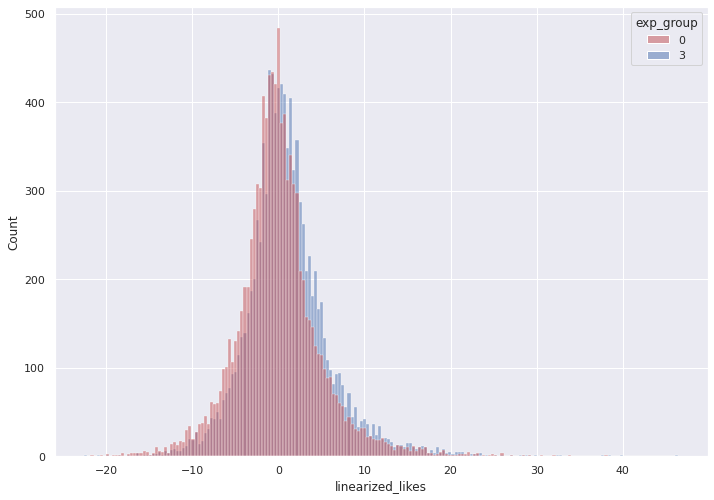

In [35]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.histplot(data=df, x='linearized_likes', hue='exp_group', kde=False, palette=['r', 'b'], alpha=0.5)

In [36]:
stats.ttest_ind(df[df['exp_group'] == 0]['ctr'], df[df['exp_group'] == 3]['ctr'], equal_var = False)

Ttest_indResult(statistic=-13.896870721904069, pvalue=1.055849414662529e-43)

In [37]:
stats.ttest_ind(df[df['exp_group'] == 0]['linearized_likes'], df[df['exp_group'] == 3]['linearized_likes'], equal_var = False)

Ttest_indResult(statistic=-15.21499546090383, pvalue=5.4914249479687664e-52)

## Summary

На основании анализа групп 0 и 3 по метрики линеаризованных лайков на гистограме визуально видно, что одна группа более явно сдвинута относительно другой группы. При этом p-value стало значительно меньше.    

# Groups 1 and 2 analysis

## Download and read data

In [38]:
query = '''
select exp_group, user_id,
sum(action = 'like') as likes,
sum(action = 'view') as views,
likes / views as ctr
from {db}.feed_actions 
where toDate(time) between '2022-11-02' and '2022-11-08' and exp_group in (1, 2)
group by exp_group, user_id
'''

In [39]:
df = select(query)

In [40]:
df

,exp_group,user_id,likes,views,ctr
0,1,109963,3,15,0.200000
1,1,26117,32,141,0.226950
2,1,138232,18,73,0.246575
3,1,26295,33,122,0.270492
4,1,18392,7,32,0.218750
...,...,...,...,...,...
20026,1,132567,45,296,0.152027
20027,1,30872,11,59,0.186441
20028,2,25383,42,127,0.330709
20029,2,139020,24,114,0.210526


## Analysis

In [41]:
ctr_control = df[df['exp_group'] == 1]['likes'].sum() / df[df['exp_group'] == 1]['views'].sum()

In [42]:
df['linearized_likes'] = df['likes'] - ctr_control * df['views']

<AxesSubplot:xlabel='linearized_likes', ylabel='Count'>

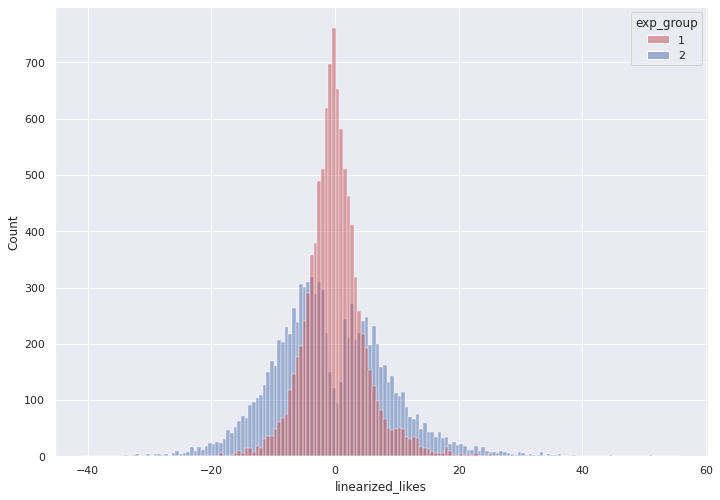

In [43]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.histplot(data=df, x='linearized_likes', hue='exp_group', kde=False, palette=['r', 'b'], alpha=0.5)

In [45]:
stats.ttest_ind(df[df['exp_group'] == 1]['ctr'], df[df['exp_group'] == 2]['ctr'], equal_var = False)

Ttest_indResult(statistic=0.7094392041270485, pvalue=0.4780623130874935)

In [28]:
stats.ttest_ind(df[df['exp_group'] == 1]['linearized_likes'], df[df['exp_group'] == 2]['linearized_likes'], equal_var = False)

Ttest_indResult(statistic=6.122579994775973, pvalue=9.439432187037712e-10)

## Summary

На основании анализа групп 1 и 2 по метрики линеаризованных лайков на гистограме визуально видно, что распределение группы 1 сконцентрировалось около 0, а распределение группы 2 стало более близким к нормальному. При этом p-value стало значительно меньше.

T-test по метрики линеаризованных лайков явно утверждает, что отличие между группами есть. Интересно, что стандартный t-test утверждал обратное.  